### 앙상블

In [5]:
import pandas as pd
import numpy as np
from IPython.display import Image

np.set_printoptions(suppress=True)

In [6]:
from sklearn.datasets import load_boston

In [7]:
data = load_boston()

C:\devtools\python\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function load_boston is deprecated; `load_boston` is deprecated in 1.0 and will be removed in 1.2.

    The Boston housing prices dataset has an ethical problem. You can refer to
    the documentation of this function for further details.

    The scikit-learn maintainers therefore strongly discourage the use of this
    dataset unless the purpose of the code is to study and educate about
    ethical issues in data science and machine learning.

    In this special case, you can fetch the dataset from the original
    source::

        import pandas as pd
        import numpy as np


        data_url = "http://lib.stat.cmu.edu/datasets/boston"
        raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
        data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
        target = raw_df.values[1::2, 2]

    Alternative datasets include the California housing dataset (i.e.
 

## 컬럼 소개

##### 속성 수 : 13

##### CRIM: 범죄율
##### ZN: 25,000 평방 피트 당 주거용 토지의 비율
##### INDUS: 비소매(non-retail) 비즈니스 면적 비율
##### CHAS: 찰스 강 더미 변수 (통로가 하천을 향하면 1; 그렇지 않으면 0)
##### NOX: 산화 질소 농도 (천만 분의 1)
##### RM:주거 당 평균 객실 수
##### AGE: 1940 년 이전에 건축된 자가 소유 점유 비율
##### DIS: 5 개의 보스턴 고용 센터까지의 가중 거리
##### RAD: 고속도로 접근성 지수
##### TAX: 10,000 달러 당 전체 가치 재산 세율
##### PTRATIO 도시 별 학생-교사 비율
##### B: 1000 (Bk-0.63) ^ 2 여기서 Bk는 도시 별 검정 비율입니다.
##### LSTAT: 인구의 낮은 지위
##### MEDV: 자가 주택의 중앙값 (1,000 달러 단위)


In [9]:
df = pd.DataFrame(data['data'], columns=data['feature_names'])

In [10]:
df['MEDV'] = data['target']

In [11]:
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [15]:
# 데이터셋 분리
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(df.drop('MEDV', 1), df['MEDV'])

C:\Users\Cha\AppData\Local\Temp/ipykernel_4872/2432666344.py:3: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  x_train, x_test, y_train, y_test = train_test_split(df.drop('MEDV', 1), df['MEDV'])


In [17]:
# 모델 성능 확인 함수
import matplotlib.pyplot as plt
import seaborn as sns

my_predictions = {}

colors = ['r', 'c', 'm', 'y', 'k', 'khaki', 'teal', 'orchid', 'sandybrown',
          'greenyellow', 'dodgerblue', 'deepskyblue', 'rosybrown', 'firebrick',
          'deeppink', 'crimson', 'salmon', 'darkred', 'olivedrab', 'olive', 
          'forestgreen', 'royalblue', 'indigo', 'navy', 'mediumpurple', 'chocolate',
          'gold', 'darkorange', 'seagreen', 'turquoise', 'steelblue', 'slategray', 
          'peru', 'midnightblue', 'slateblue', 'dimgray', 'cadetblue', 'tomato'
         ]

def plot_predictions(name_, pred, actual):
    df = pd.DataFrame({'prediction': pred, 'actual': y_test})
    df = df.sort_values(by='actual').reset_index(drop=True)

    plt.figure(figsize=(12, 9))
    plt.scatter(df.index, df['prediction'], marker='x', color='r')
    plt.scatter(df.index, df['actual'], alpha=0.7, marker='o', color='black')
    plt.title(name_, fontsize=15)
    plt.legend(['prediction', 'actual'], fontsize=12)
    plt.show()

def mse_eval(name_, pred, actual):
    global predictions
    global colors

    plot_predictions(name_, pred, actual)

    mse = mean_squared_error(pred, actual)
    my_predictions[name_] = mse

    y_value = sorted(my_predictions.items(), key=lambda x: x[1], reverse=True)
    
    df = pd.DataFrame(y_value, columns=['model', 'mse'])
    print(df)
    min_ = df['mse'].min() - 10
    max_ = df['mse'].max() + 10
    
    length = len(df)
    
    plt.figure(figsize=(10, length))
    ax = plt.subplot()
    ax.set_yticks(np.arange(len(df)))
    ax.set_yticklabels(df['model'], fontsize=15)
    bars = ax.barh(np.arange(len(df)), df['mse'])
    
    for i, v in enumerate(df['mse']):
        idx = np.random.choice(len(colors))
        bars[i].set_color(colors[idx])
        ax.text(v + 2, i, str(round(v, 3)), color='k', fontsize=15, fontweight='bold')
        
    plt.title('MSE Error', fontsize=18)
    plt.xlim(min_, max_)
    
    plt.show()

def remove_model(name_):
    global my_predictions
    try:
        del my_predictions[name_]
    except KeyError:
        return False
    return True

def plot_coef(columns, coef):
    coef_df = pd.DataFrame(list(zip(columns, coef)))
    coef_df.columns=['feature', 'coef']
    coef_df = coef_df.sort_values('coef', ascending=False).reset_index(drop=True)
    
    fig, ax = plt.subplots(figsize=(9, 7))
    ax.barh(np.arange(len(coef_df)), coef_df['coef'])
    idx = np.arange(len(coef_df))
    ax.set_yticks(idx)
    ax.set_yticklabels(coef_df['feature'])
    fig.tight_layout()
    plt.show()

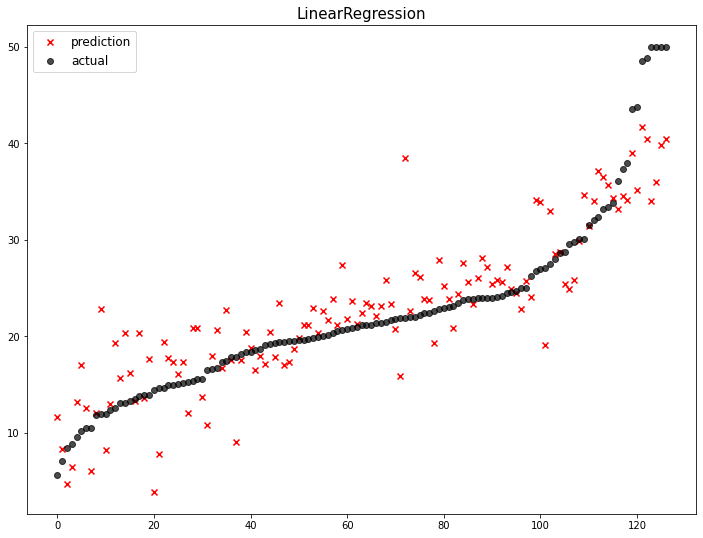

              model        mse
0  LinearRegression  21.340498


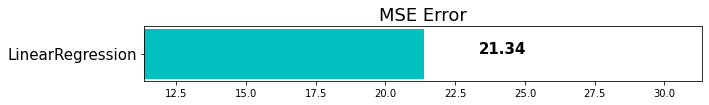

In [18]:
# 평가지표
from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import PolynomialFeatures

linear_reg = LinearRegression(n_jobs=-1)
linear_reg.fit(x_train, y_train)
pred = linear_reg.predict(x_test)
mse_eval('LinearRegression', pred, y_test)

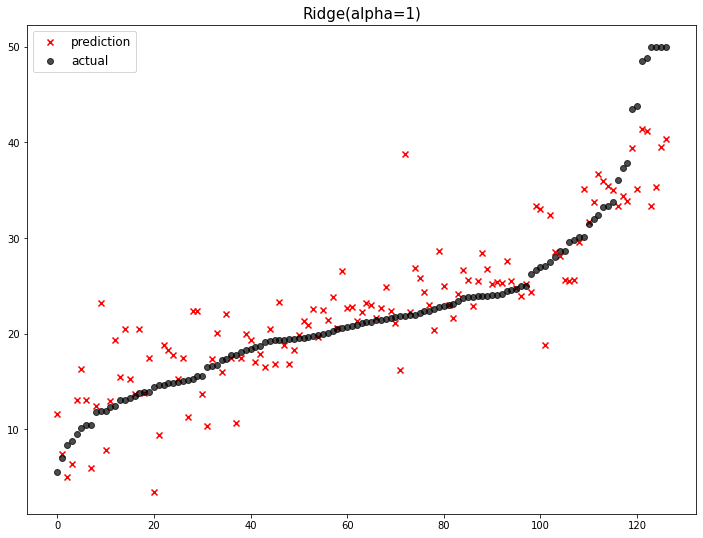

              model        mse
0  LinearRegression  21.340498
1    Ridge(alpha=1)  21.185711


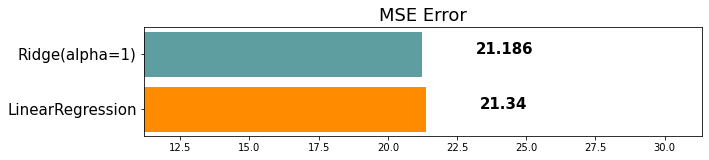

In [19]:
ridge = Ridge()
ridge.fit(x_train, y_train)
pred = ridge.predict(x_test)
mse_eval('Ridge(alpha=1)', pred, y_test)

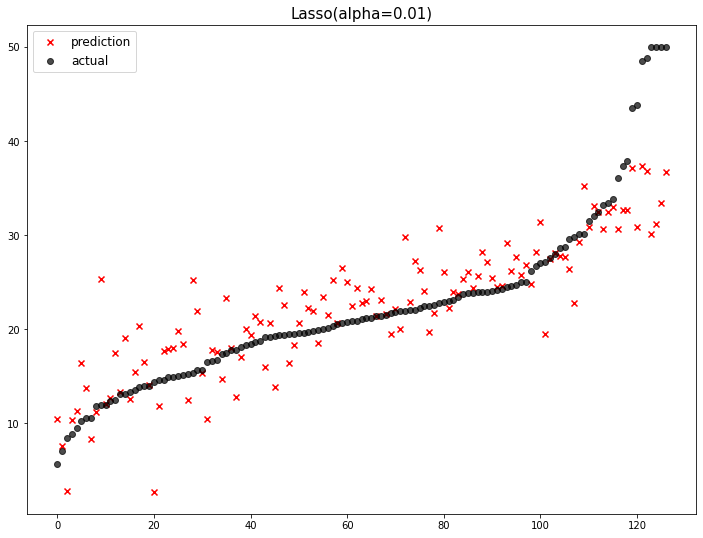

               model        mse
0  Lasso(alpha=0.01)  26.305442
1   LinearRegression  21.340498
2     Ridge(alpha=1)  21.185711


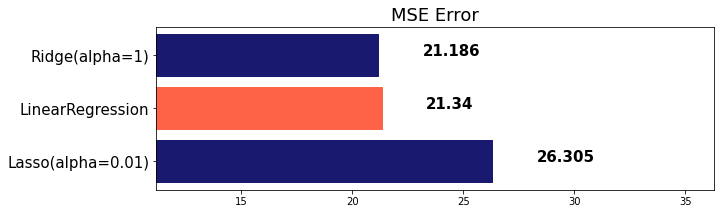

In [20]:
lasso = Lasso()
lasso.fit(x_train, y_train)
pred = lasso.predict(x_test)
mse_eval('Lasso(alpha=0.01)', pred, y_test)

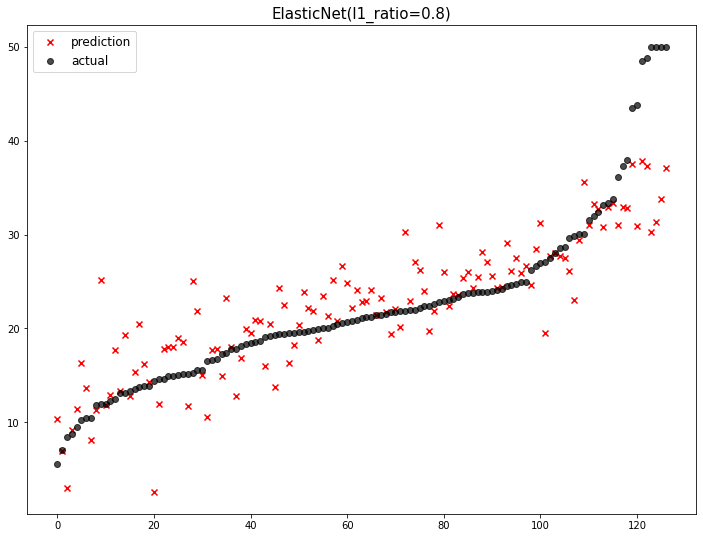

                      model        mse
0         Lasso(alpha=0.01)  26.305442
1  ElasticNet(l1_ratio=0.8)  25.633785
2          LinearRegression  21.340498
3            Ridge(alpha=1)  21.185711


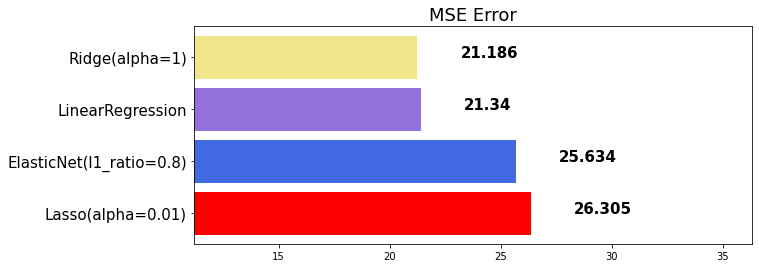

In [21]:
elasticnet = ElasticNet()
elasticnet.fit(x_train, y_train)
pred = elasticnet.predict(x_test)
mse_eval('ElasticNet(l1_ratio=0.8)', pred, y_test)    

C:\devtools\python\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 5.595e+01, tolerance: 3.200e+00
  model = cd_fast.enet_coordinate_descent(


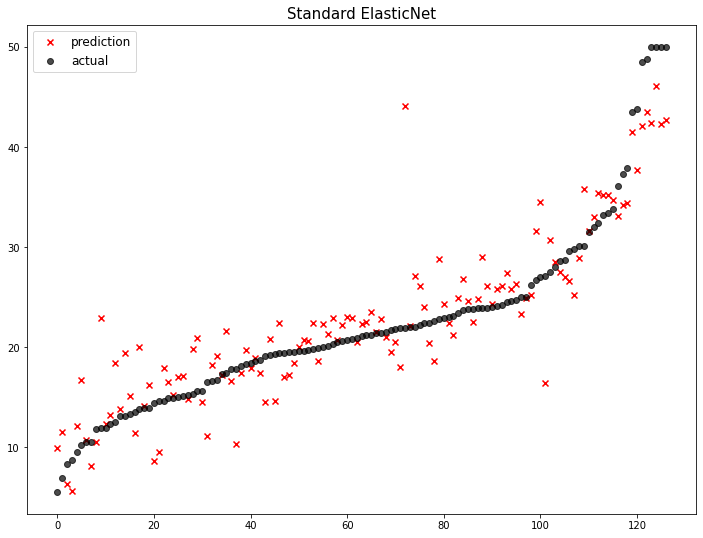

                      model        mse
0         Lasso(alpha=0.01)  26.305442
1  ElasticNet(l1_ratio=0.8)  25.633785
2          LinearRegression  21.340498
3            Ridge(alpha=1)  21.185711
4       Standard ElasticNet  15.975519


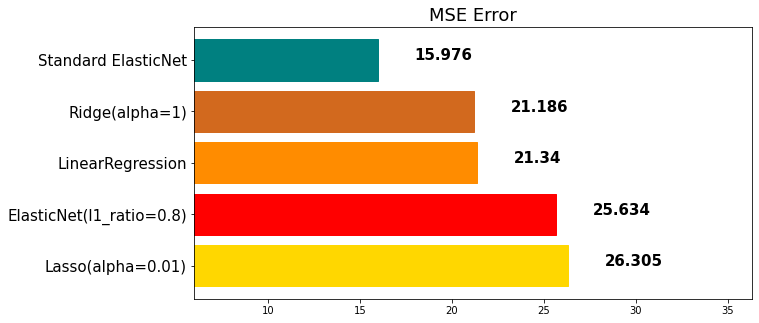

In [22]:
elasticnet_pipeline = make_pipeline(
    PolynomialFeatures(degree=2, include_bias=False),
    StandardScaler(),
    ElasticNet(alpha=0.1, l1_ratio=0.2)
)
elasticnet_pred = elasticnet_pipeline.fit(x_train, y_train).predict(x_test)
mse_eval('Standard ElasticNet', elasticnet_pred, y_test)

C:\devtools\python\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 5.595e+01, tolerance: 3.200e+00
  model = cd_fast.enet_coordinate_descent(


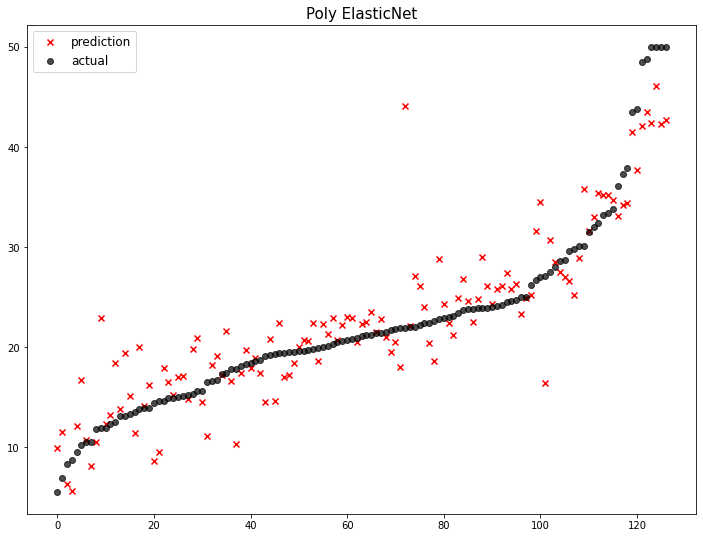

                      model        mse
0         Lasso(alpha=0.01)  26.305442
1  ElasticNet(l1_ratio=0.8)  25.633785
2          LinearRegression  21.340498
3            Ridge(alpha=1)  21.185711
4       Standard ElasticNet  15.975519
5           Poly ElasticNet  15.975519


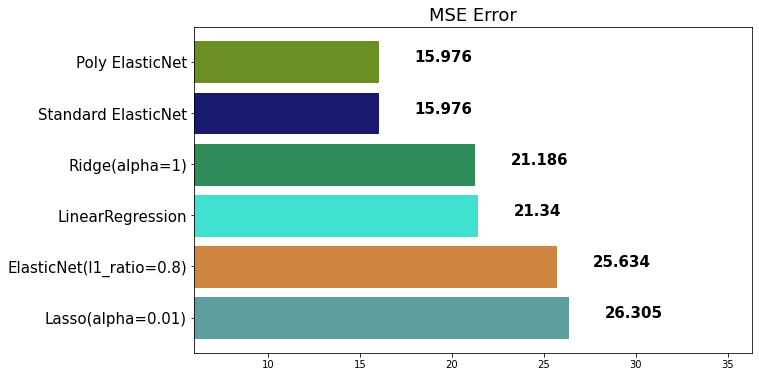

In [23]:
poly_pipeline = make_pipeline(
    PolynomialFeatures(degree=2, include_bias=False),
    StandardScaler(),
    ElasticNet(alpha=0.1, l1_ratio=0.2)
)
poly_pred = poly_pipeline.fit(x_train, y_train).predict(x_test)
mse_eval('Poly ElasticNet', poly_pred, y_test)

### 보팅 (Voting) - 회귀(Regression)

In [33]:
from sklearn.ensemble import VotingRegressor

In [34]:
# 보팅을 위한 모델들 세팅
# 반드시 Tuple 형태로 정의
single_models = [
    ('linear_reg', linear_reg),
    ('ridge', ridge),
    ('lasso', lasso),
    ('elasticnet_pipeline', elasticnet_pipeline),
    ('poly_pipeline', poly_pipeline)
]

In [35]:
# 보팅 세팅
voting_regressor = VotingRegressor(single_models, n_jobs=-1)

In [36]:
voting_regressor.fit(x_train, y_train)

VotingRegressor(estimators=[('linear_reg', LinearRegression(n_jobs=-1)),
                            ('ridge', Ridge()), ('lasso', Lasso()),
                            ('elasticnet_pipeline',
                             Pipeline(steps=[('polynomialfeatures',
                                              PolynomialFeatures(include_bias=False)),
                                             ('standardscaler',
                                              StandardScaler()),
                                             ('elasticnet',
                                              ElasticNet(alpha=0.1,
                                                         l1_ratio=0.2))])),
                            ('poly_pipeline',
                             Pipeline(steps=[('polynomialfeatures',
                                              PolynomialFeatures(include_bias=False)),
                                             ('standardscaler',
                                              Standard

In [37]:
voting_pred = voting_regressor.predict(x_test)

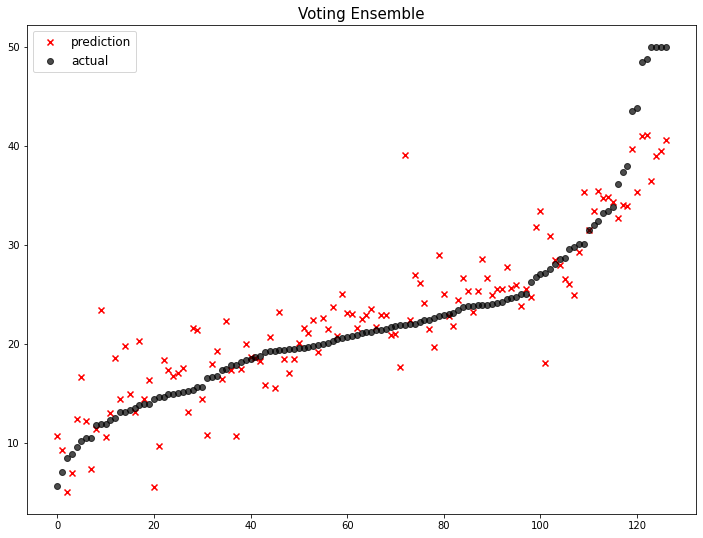

                      model        mse
0         Lasso(alpha=0.01)  26.305442
1  ElasticNet(l1_ratio=0.8)  25.633785
2          LinearRegression  21.340498
3            Ridge(alpha=1)  21.185711
4           Voting Ensemble  18.202945
5       Standard ElasticNet  15.975519
6           Poly ElasticNet  15.975519


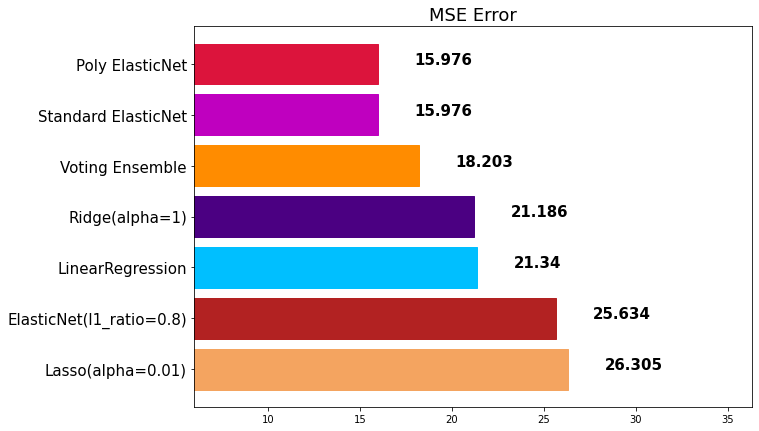

In [38]:
mse_eval('Voting Ensemble', voting_pred, y_test)

In [39]:
# 보팅 분류
from sklearn.ensemble import VotingClassifier

### 배깅 - 랜덤포레스트

In [41]:
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier

In [42]:
rtr = RandomForestRegressor()
rtr.fit(x_train, y_train)

RandomForestRegressor()

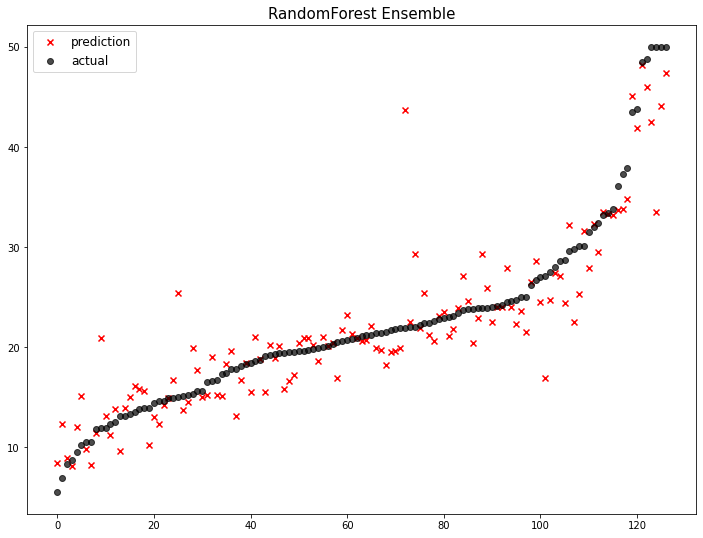

                      model        mse
0         Lasso(alpha=0.01)  26.305442
1  ElasticNet(l1_ratio=0.8)  25.633785
2          LinearRegression  21.340498
3            Ridge(alpha=1)  21.185711
4           Voting Ensemble  18.202945
5       Standard ElasticNet  15.975519
6           Poly ElasticNet  15.975519
7     RandomForest Ensemble  14.206602


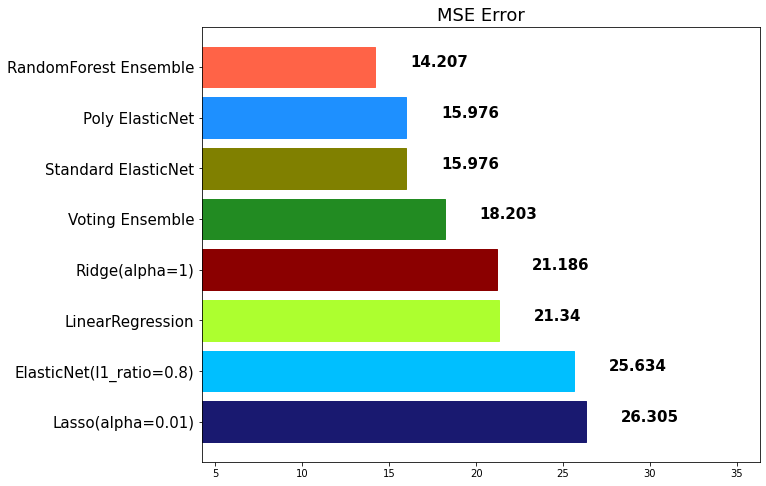

In [44]:
rtr_pred = rtr.predict(x_test)
mse_eval('RandomForest Ensemble', rtr_pred, y_test)

### 부스팅

In [45]:
from sklearn.ensemble import GradientBoostingRegressor, GradientBoostingClassifier

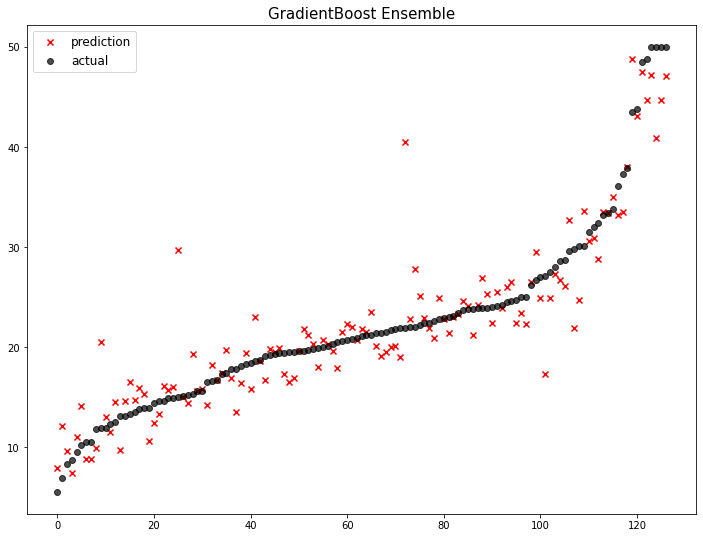

                      model        mse
0         Lasso(alpha=0.01)  26.305442
1  ElasticNet(l1_ratio=0.8)  25.633785
2          LinearRegression  21.340498
3            Ridge(alpha=1)  21.185711
4           Voting Ensemble  18.202945
5       Standard ElasticNet  15.975519
6           Poly ElasticNet  15.975519
7     RandomForest Ensemble  14.206602
8    GradientBoost Ensemble  11.526374


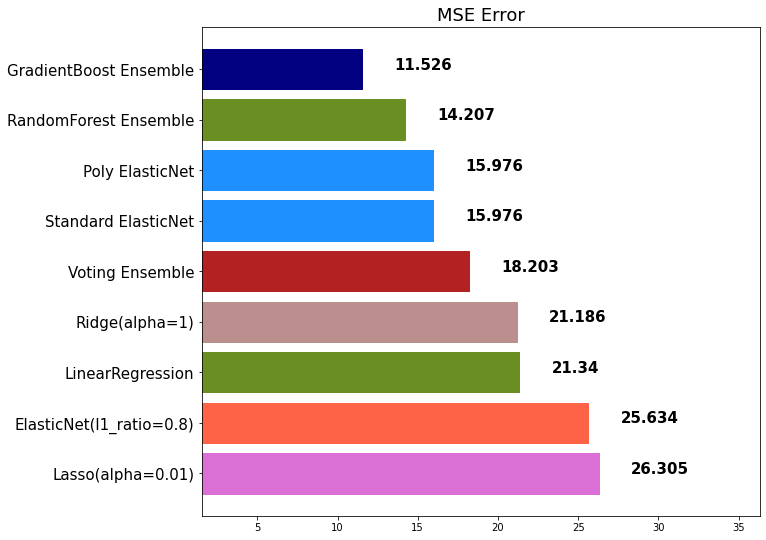

In [46]:
gbr = GradientBoostingRegressor(random_state=42)
gbr.fit(x_train, y_train)
gbr_pred = gbr.predict(x_test)
mse_eval('GradientBoost Ensemble', gbr_pred, y_test)

In [48]:
#XGBoost
from xgboost import XGBRegressor, XGBClassifier

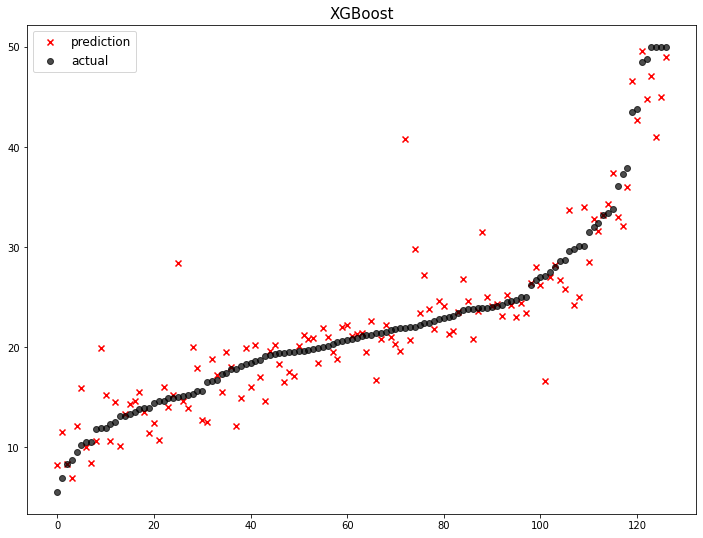

                      model        mse
0         Lasso(alpha=0.01)  26.305442
1  ElasticNet(l1_ratio=0.8)  25.633785
2          LinearRegression  21.340498
3            Ridge(alpha=1)  21.185711
4           Voting Ensemble  18.202945
5       Standard ElasticNet  15.975519
6           Poly ElasticNet  15.975519
7     RandomForest Ensemble  14.206602
8                   XGBoost  12.281646
9    GradientBoost Ensemble  11.526374


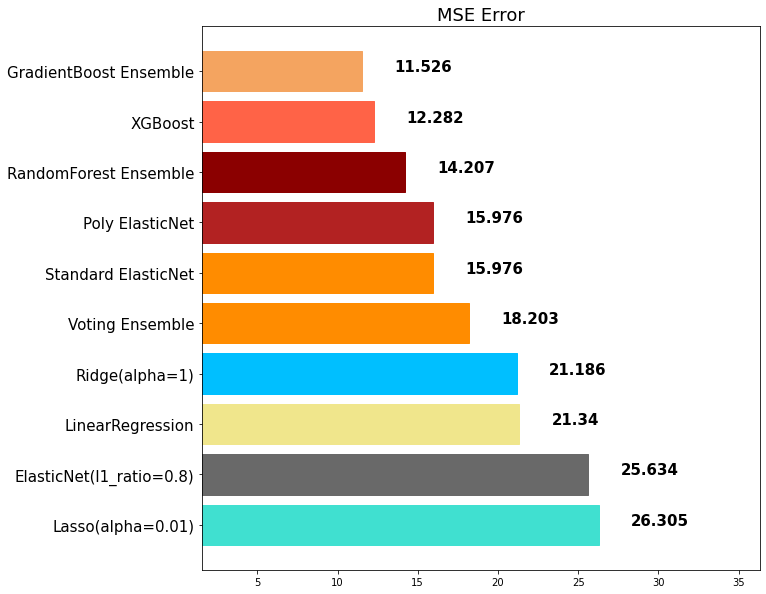

In [49]:
xgb = XGBRegressor(random_state=42)
xgb.fit(x_train, y_train)
xgb_pred = xgb.predict(x_test)
mse_eval('XGBoost', xgb_pred, y_test)

In [51]:
# LigthGBM
from lightgbm import LGBMRegressor, LGBMClassifier

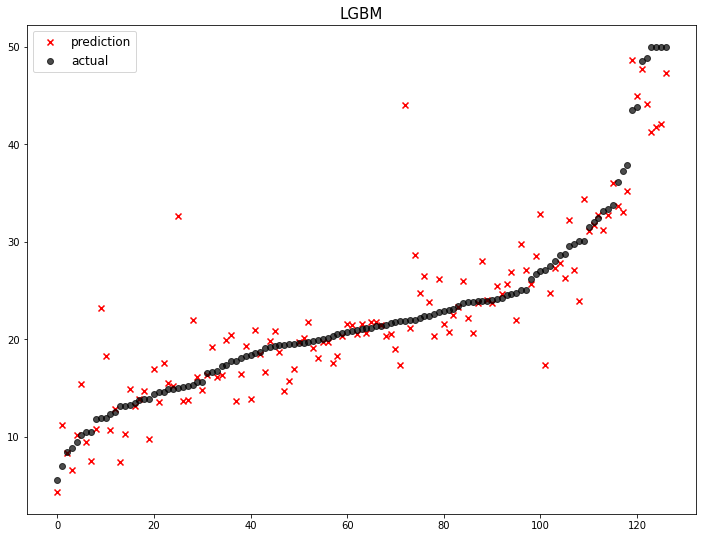

                       model        mse
0          Lasso(alpha=0.01)  26.305442
1   ElasticNet(l1_ratio=0.8)  25.633785
2           LinearRegression  21.340498
3             Ridge(alpha=1)  21.185711
4            Voting Ensemble  18.202945
5                       LGBM  15.976470
6        Standard ElasticNet  15.975519
7            Poly ElasticNet  15.975519
8      RandomForest Ensemble  14.206602
9                    XGBoost  12.281646
10    GradientBoost Ensemble  11.526374


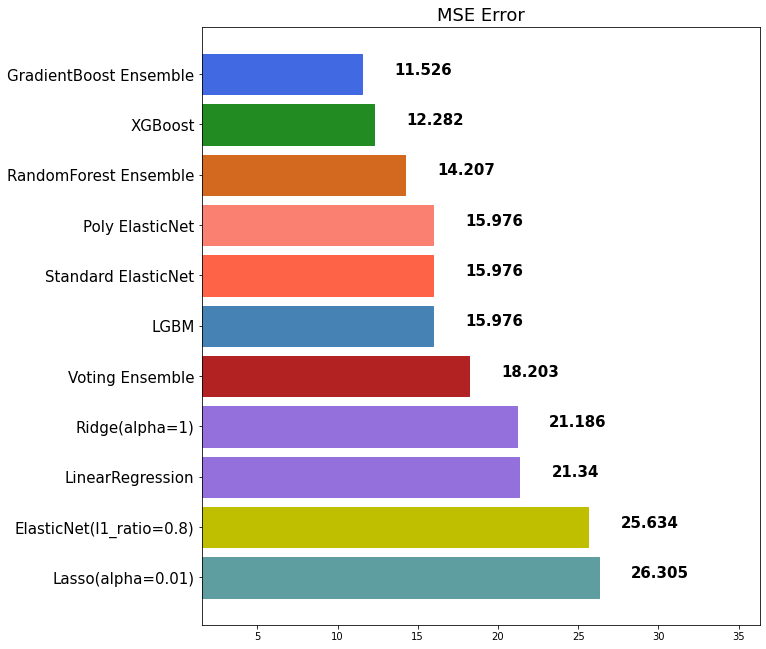

In [52]:
lgbm = LGBMRegressor(random_state=42)
lgbm.fit(x_train, y_train)
lgbm_pred = lgbm.predict(x_test)
mse_eval('LGBM', lgbm_pred, y_test)

In [53]:
# 스태킹
from sklearn.ensemble import StackingRegressor

In [55]:
stack_models = [
    ('elasticnet', poly_pipeline),
    ('randomforest', rtr),
    ('gbr', gbr),
    ('lgbm', lgbm)
]

In [56]:
stack_reg = StackingRegressor(stack_models, final_estimator=xgb, n_jobs=-1)

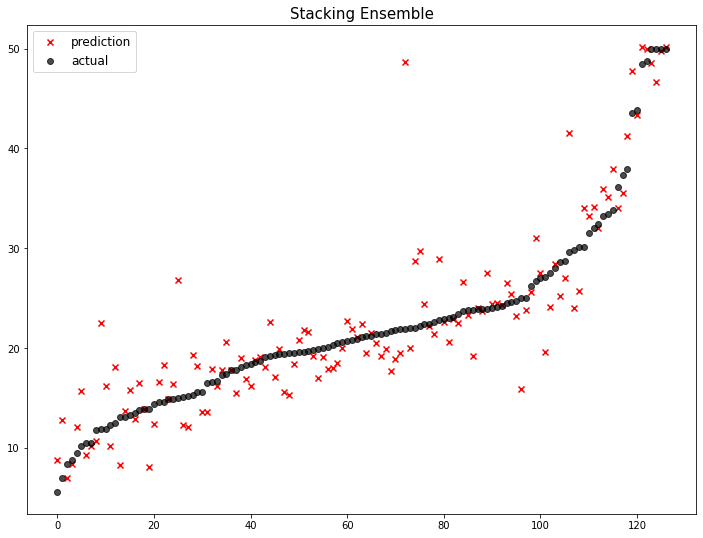

                       model        mse
0          Lasso(alpha=0.01)  26.305442
1   ElasticNet(l1_ratio=0.8)  25.633785
2           LinearRegression  21.340498
3             Ridge(alpha=1)  21.185711
4            Voting Ensemble  18.202945
5          Stacking Ensemble  16.591946
6                       LGBM  15.976470
7        Standard ElasticNet  15.975519
8            Poly ElasticNet  15.975519
9      RandomForest Ensemble  14.206602
10                   XGBoost  12.281646
11    GradientBoost Ensemble  11.526374


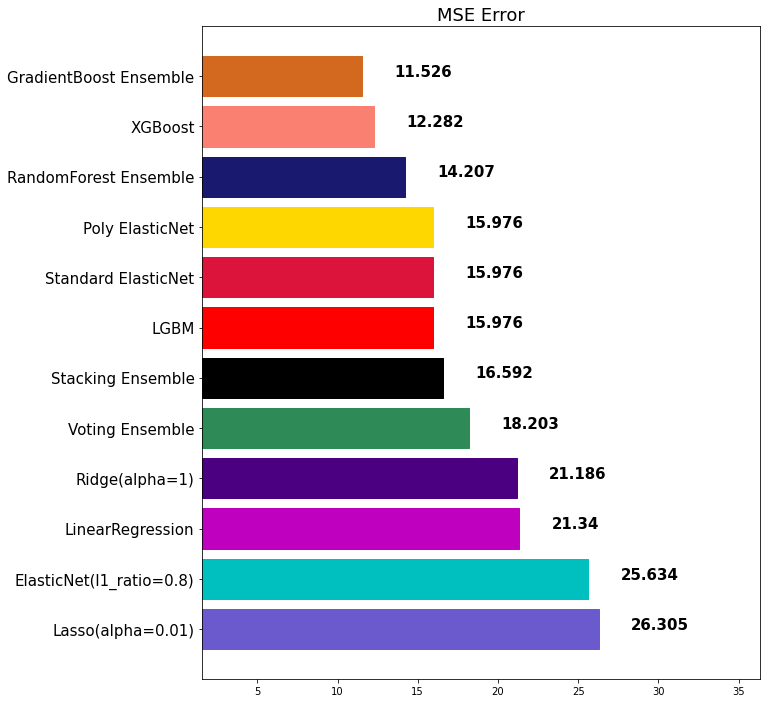

In [57]:
stack_reg.fit(x_train, y_train)
stack_pred = stack_reg.predict(x_test)
mse_eval('Stacking Ensemble', stack_pred, y_test)

In [60]:
# Weighted Belnding
final_outputs = {
    'elasticnet':poly_pred,
    'randomforest':rtr_pred,
    'gbr':gbr_pred,
    'xgb':xgb_pred,
    'lgbm':lgbm_pred,
    'stacking':stack_pred
}

In [61]:
final_prediction=\
final_ouputs['elasticnet'] * 0.1\

SyntaxError: unexpected EOF while parsing (Temp/ipykernel_4872/2572260891.py, line 2)

### Cross Validation

In [62]:
from sklearn.model_selection import KFold

In [65]:
n_splits = 5
kfold = KFold(n_splits=n_splits, random_state=42, shuffle=True)

In [66]:
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [67]:
X = np.array(df.drop('MEDV', 1))
Y = np.array(df['MEDV'])

C:\Users\Cha\AppData\Local\Temp/ipykernel_4872/600749597.py:1: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  X = np.array(df.drop('MEDV', 1))


In [69]:
X

array([[  0.00632,  18.     ,   2.31   , ...,  15.3    , 396.9    ,
          4.98   ],
       [  0.02731,   0.     ,   7.07   , ...,  17.8    , 396.9    ,
          9.14   ],
       [  0.02729,   0.     ,   7.07   , ...,  17.8    , 392.83   ,
          4.03   ],
       ...,
       [  0.06076,   0.     ,  11.93   , ...,  21.     , 396.9    ,
          5.64   ],
       [  0.10959,   0.     ,  11.93   , ...,  21.     , 393.45   ,
          6.48   ],
       [  0.04741,   0.     ,  11.93   , ...,  21.     , 396.9    ,
          7.88   ]])

In [68]:
# 속도가 빠른 LGBM 을 사용하고 이 모델 테스트
lgbm_fold = LGBMRegressor(random_state=42)

In [70]:
i = 1
total_error = 0
for train_index, test_index in kfold.split(X): # 'kfold.split' 이 알아서 교차 검증 데이터를 나눔
    x_train_fold, x_test_fold = X[train_index], X[test_index]
    y_train_fold, y_test_fold = Y[train_index], Y[test_index]
    lgbm_pred_fold = lgbm_fold.fit(x_train_fold, y_train_fold).predict(x_test_fold)
    error = mean_squared_error(lgbm_pred_fold, y_test_fold)
    print('Fold = {}, prediction score = {:.2f}'.format(i, error))
    total_error += error
    i+=1
print('---'*10)
print('Average Error: %s' % (total_error / n_splits))

Fold = 1, prediction score = 8.34
Fold = 2, prediction score = 10.40
Fold = 3, prediction score = 17.58
Fold = 4, prediction score = 6.94
Fold = 5, prediction score = 12.16
------------------------------
Average Error: 11.083201392666322


### 하이퍼 파라미터 자동화

In [ ]:
주요 Hyperparameter (LGBM)

random_state: 랜덤 시드 고정 값. 고정해두고 튜닝할 것!
n_jobs: CPU 사용 갯수
learning_rate: 학습율. 너무 큰 학습율은 성능을 떨어뜨리고, 너무 작은 학습율은 학습이 느리다. 적절한 값을 찾아야함. n_estimators와 같이 튜닝. default=0.1
n_estimators: 부스팅 스테이지 수. (랜덤포레스트 트리의 갯수 설정과 비슷한 개념). default=100
max_depth: 트리의 깊이. 과대적합 방지용. default=3.
colsample_bytree: 샘플 사용 비율 (max_features와 비슷한 개념). 과대적합 방지용. default=1.0

### RandomizedSearchCV

In [71]:
params = {
    'n_estimators':[200,500,1000,2000],
    'learning_rate':[0.1, 0.05, 0.01],
    'max_depth':[6,7,8],
    'colsample_bytree':[0.8,0.9,0.1],
    'subsample':[0.8,0.9,1.0]
}

In [72]:
from sklearn.model_selection import RandomizedSearchCV

In [73]:
# cv = 교차검증 겹 설정
# n_iter = 랜덤값 25회 시도
# scoring = 설정된 에러 값을 구함
clf = RandomizedSearchCV(LGBMRegressor(), params, random_state=42, cv=3, n_iter=25, scoring='neg_mean_squared_error')

In [74]:
clf.fit(x_train, y_train)

RandomizedSearchCV(cv=3, estimator=LGBMRegressor(), n_iter=25,
                   param_distributions={'colsample_bytree': [0.8, 0.9, 0.1],
                                        'learning_rate': [0.1, 0.05, 0.01],
                                        'max_depth': [6, 7, 8],
                                        'n_estimators': [200, 500, 1000, 2000],
                                        'subsample': [0.8, 0.9, 1.0]},
                   random_state=42, scoring='neg_mean_squared_error')

In [75]:
clf.best_score_

-11.559039903559041

In [76]:
clf.best_params_

{'subsample': 1.0,
 'n_estimators': 1000,
 'max_depth': 7,
 'learning_rate': 0.05,
 'colsample_bytree': 0.9}

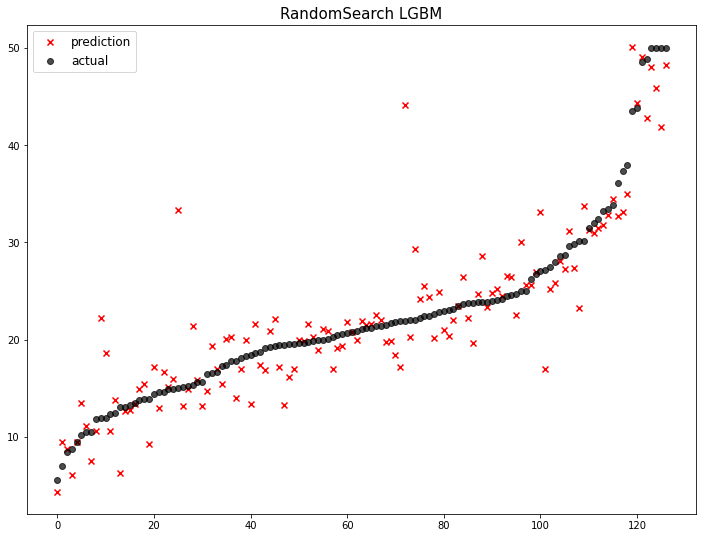

                       model        mse
0          Lasso(alpha=0.01)  26.305442
1   ElasticNet(l1_ratio=0.8)  25.633785
2           LinearRegression  21.340498
3             Ridge(alpha=1)  21.185711
4            Voting Ensemble  18.202945
5          Stacking Ensemble  16.591946
6                       LGBM  15.976470
7        Standard ElasticNet  15.975519
8            Poly ElasticNet  15.975519
9          RandomSearch LGBM  15.749924
10     RandomForest Ensemble  14.206602
11                   XGBoost  12.281646
12    GradientBoost Ensemble  11.526374


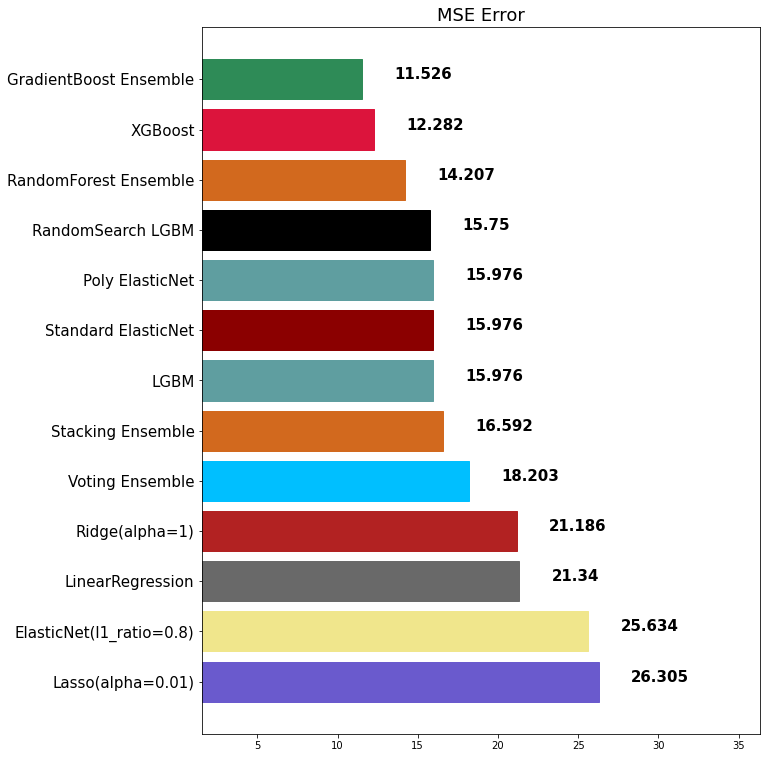

In [77]:
lgbm_best = LGBMRegressor(n_estimators=1000, subsample=1.0, max_depth=7, learning_rate=0.05,colsample_bytree=0.9   )
lgbm_best_pred = lgbm_best.fit(x_train, y_train).predict(x_test)
mse_eval('RandomSearch LGBM', lgbm_best_pred, y_test)

### GridSearchCV

In [78]:
params = {
    'n_estimators': [500, 1000], 
    'learning_rate': [0.1, 0.05, 0.01], 
    'max_depth': [7, 8], 
    'colsample_bytree': [0.8, 0.9], 
    'subsample': [0.8, 0.9,],
}

In [79]:
from sklearn.model_selection import GridSearchCV

In [80]:
grid_search = GridSearchCV(LGBMRegressor(), params, cv=3, n_jobs=-1, scoring='neg_mean_squared_error')

In [81]:
grid_search.fit(x_train, y_train)

GridSearchCV(cv=3, estimator=LGBMRegressor(), n_jobs=-1,
             param_grid={'colsample_bytree': [0.8, 0.9],
                         'learning_rate': [0.1, 0.05, 0.01],
                         'max_depth': [7, 8], 'n_estimators': [500, 1000],
                         'subsample': [0.8, 0.9]},
             scoring='neg_mean_squared_error')

In [83]:
grid_search.best_params_

{'colsample_bytree': 0.9,
 'learning_rate': 0.05,
 'max_depth': 8,
 'n_estimators': 1000,
 'subsample': 0.8}

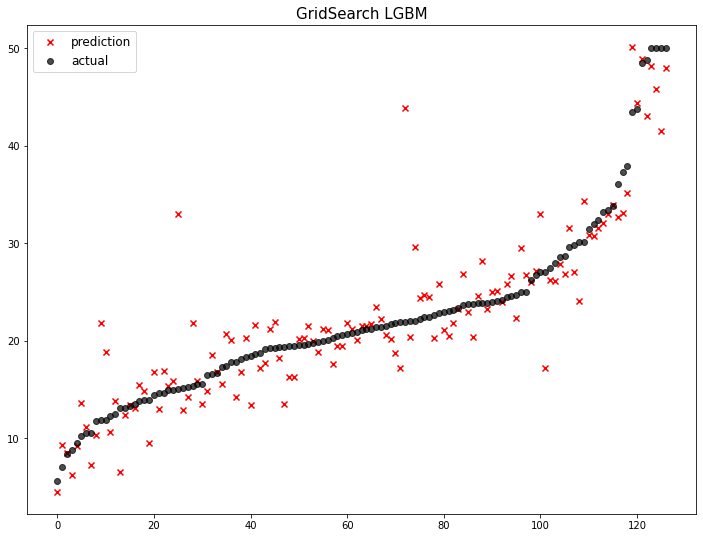

                       model        mse
0          Lasso(alpha=0.01)  26.305442
1   ElasticNet(l1_ratio=0.8)  25.633785
2           LinearRegression  21.340498
3             Ridge(alpha=1)  21.185711
4            Voting Ensemble  18.202945
5          Stacking Ensemble  16.591946
6                       LGBM  15.976470
7        Standard ElasticNet  15.975519
8            Poly ElasticNet  15.975519
9          RandomSearch LGBM  15.280605
10           GridSearch LGBM  15.280605
11     RandomForest Ensemble  14.206602
12                   XGBoost  12.281646
13    GradientBoost Ensemble  11.526374


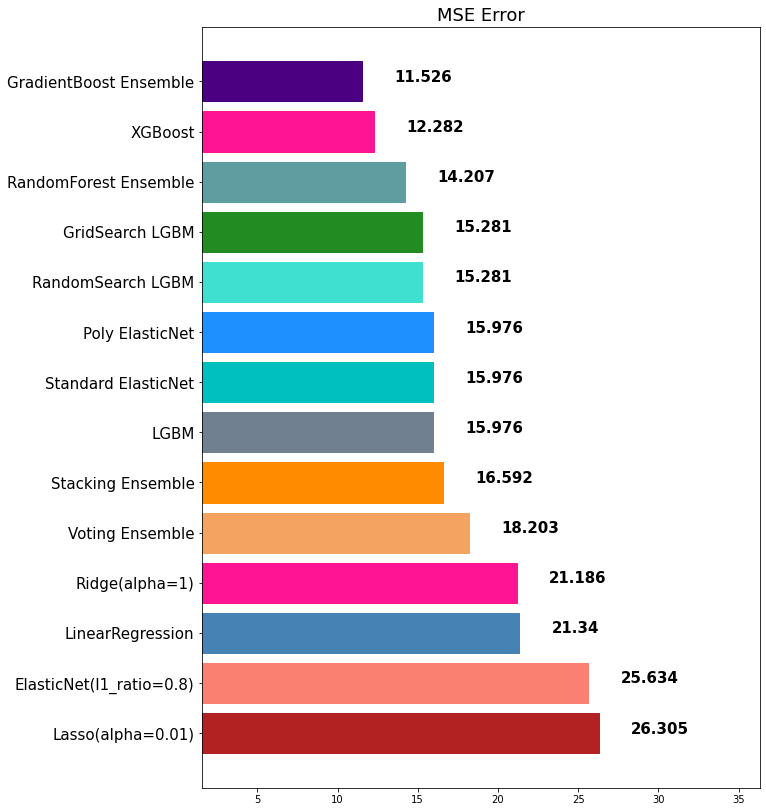

In [85]:
lgbm_best = LGBMRegressor(n_estimators=1000, subsample=0.8, max_depth=8, learning_rate=0.05,colsample_bytree=0.9)
lgbm_best_pred = lgbm_best.fit(x_train, y_train).predict(x_test)
mse_eval('GridSearch LGBM', lgbm_best_pred, y_test)